# Stock Market Prediction using Machine Learning

In this project we are going to predict wether to buy a share for swing trading or not.

## Importing important libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
import sklearn

In [ ]:
data = quandl.get("NSE/TATAGLOBAL")

## Dataframe Analysis

In [ ]:
data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98


In [ ]:
cols = ['Last','Turnover (Lacs)']
data = data.drop(columns=cols,axis=1)
data['Volume'] = data['Total Trade Quantity']
data = data.drop(columns=['Total Trade Quantity'])

In [ ]:
data['Close - Open'] = data['Close'] - data['Open']
data['High - Low'] = data['High'] - data['Low']

In [ ]:
data.head()

,Open,High,Low,Close,Volume,Close - Open,High - Low
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.55,658666.0,-0.55,1.95
2010-07-22,120.3,122.00,120.25,120.90,293312.0,0.60,1.75
2010-07-23,121.8,121.95,120.25,120.65,281312.0,-1.15,1.70
2010-07-26,120.1,121.00,117.10,117.60,658440.0,-2.50,3.90
2010-07-27,117.6,119.50,112.00,118.65,586100.0,1.05,7.50




### Y2 Column

In [ ]:
# Function to categorize percentage change
def categorize_change(percentage_change):
    if percentage_change >= 0:
        return 1  # Positive change
    else:
        return -1  # Negative change

# Calculate rolling maximum and minimum
data['max_high_next_7_days'] = data['High'].rolling(window=7, min_periods=1).max().shift(-6)
data['min_low_next_7_days'] = data['Low'].rolling(window=7, min_periods=1).min().shift(-6)

# Calculate percentage changes
data['percentage_change_high'] = (data['max_high_next_7_days'] - data['Close']) / data['Close'] * 100
data['percentage_change_low'] = (data['min_low_next_7_days'] - data['Close']) / data['Close'] * 100


# Drop intermediate columns if not needed
data.drop(columns=['max_high_next_7_days', 'min_low_next_7_days'], inplace=True)

In [ ]:
# Determine which percent change is farthest from 0
data['farthest_percent_change'] = data.apply(lambda row: row['percentage_change_high'] if abs(row['percentage_change_high']) > abs(row['percentage_change_low']) else row['percentage_change_low'], axis=1)

In [ ]:
def categorize_change(percentage_change):
    if percentage_change > 7:
        return 3
    elif percentage_change > 5:
        return 2
    elif percentage_change > 2:
        return 1
    elif percentage_change > -2:
        return 0
    elif percentage_change > -5:
        return -1
    elif percentage_change > -7:
        return -2
    else:
        return -3

In [ ]:
data['Y2'] = data['farthest_percent_change'].apply(categorize_change)

In [ ]:
data.head(15)

,Open,High,Low,Close,Volume,Close - Open,High - Low,percentage_change_high,percentage_change_low,farthest_percent_change,Y2
Date,,,,,,,,,,,
2010-07-21,122.1,123.00,121.05,121.55,658666.0,-0.55,1.95,1.192925,-7.856849,-7.856849,-3
2010-07-22,120.3,122.00,120.25,120.90,293312.0,0.60,1.75,0.909843,-7.361456,-7.361456,-3
2010-07-23,121.8,121.95,120.25,120.65,281312.0,-1.15,1.70,1.077497,-7.169499,-7.169499,-3
2010-07-26,120.1,121.00,117.10,117.60,658440.0,-2.50,3.90,3.486395,-4.761905,-4.761905,-1
2010-07-27,117.6,119.50,112.00,118.65,586100.0,1.05,7.50,2.570586,-5.604720,-5.604720,-2
2010-07-28,118.0,120.50,117.20,118.25,835593.0,0.25,3.30,2.917548,-4.862579,-4.862579,-1
2010-07-29,112.5,121.70,112.50,116.60,2359134.0,4.10,9.20,4.373928,-4.159520,4.373928,1
2010-07-30,116.5,118.00,114.60,116.05,2656191.0,-0.45,3.40,3.360620,-3.705299,-3.705299,-1
2010-08-02,117.3,118.50,116.60,117.30,663593.0,0.00,1.90,2.259165,-4.901961,-4.901961,-1


### Adding 20 SMA feature

In [ ]:
window_size = 20
data['20 SMA'] = data['Close'].rolling(window=window_size).mean()
data = data.dropna()

In [ ]:
def movavg20 (close,ma):
    if close >= ma:
        return 1
    else:
        return 0

In [ ]:
data['20MA'] = data.apply(lambda row: movavg20(row['Close'], row['20 SMA']), axis=1)

<ipython-input-39-973feb6773ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['20MA'] = data.apply(lambda row: movavg20(row['Close'], row['20 SMA']), axis=1)


<Axes: xlabel='20MA', ylabel='count'>

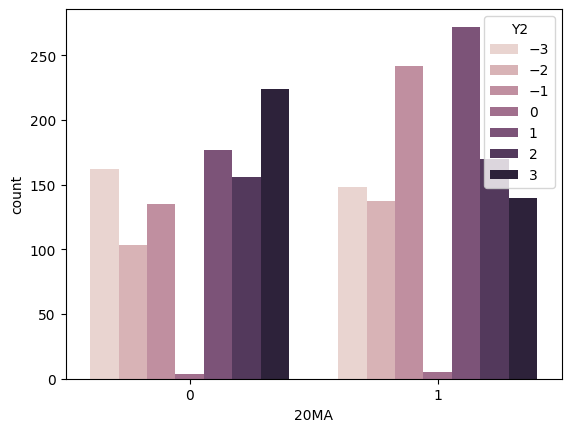

In [ ]:
sns.countplot(x='20MA', data=data, hue='Y2')

- The above plot indicates that stock price below 20SMA indicates of buying the stock, as it could be underpriced.
- Also price above 20SMA indicates neutralness or slight bearishness.

### Adding VWAP

In [ ]:
def calculate_vwap(data):
    typical_price = (data['High'] + data['Low'] + data['Close']) / 3
    cumulative_volume = data['Volume'].cumsum()
    cumulative_volume_price = (data['Volume'] * typical_price).cumsum()
    vwap = cumulative_volume_price / cumulative_volume
    return vwap

data['VWAP'] = calculate_vwap(data)

In [ ]:
data.head()

,Open,High,Low,Close,Volume,Close - Open,High - Low,percentage_change_high,percentage_change_low,farthest_percent_change,Y2,20 SMA,20MA,VWAP
Date,,,,,,,,,,,,,,
2010-08-17,111.90,112.40,109.70,110.10,1079479.0,-1.80,2.70,8.810173,-1.816530,8.810173,3,115.7800,0,110.733333
2010-08-18,110.15,111.20,108.10,108.85,959932.0,-1.30,3.10,10.059715,-0.689022,10.059715,3,115.1450,0,110.097901
2010-08-19,110.00,114.35,108.50,113.05,1643818.0,3.05,5.85,6.015038,-4.024768,6.015038,2,114.7525,0,110.931927
2010-08-20,112.00,113.40,111.05,111.50,653286.0,-0.50,2.35,7.488789,-0.403587,7.488789,3,114.2950,0,111.090319
2010-08-23,114.00,118.25,112.00,116.70,4033916.0,2.70,6.25,3.684662,-4.027421,-4.027421,-1,114.2500,1,113.287741


### Momentum


In [ ]:
data['Momentum'] = (data['Close'].diff(7) / data['Close'].shift(7)) * 100

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.head(15)

,Open,High,Low,Close,Volume,Close - Open,High - Low,percentage_change_high,percentage_change_low,farthest_percent_change,Y2,20 SMA,20MA,VWAP,Momentum
Date,,,,,,,,,,,,,,,
2010-08-26,118.20,119.35,116.60,118.15,2531255.0,-0.05,2.75,5.416843,-1.735083,5.416843,2,114.1550,1,115.310168,7.311535
2010-08-27,119.00,119.85,117.10,117.75,1375227.0,-1.25,2.75,5.859873,-1.401274,5.859873,2,114.2400,1,115.542455,8.176390
2010-08-30,118.80,119.70,116.70,117.60,463046.0,-1.20,3.00,9.268707,-1.275510,9.268707,3,114.2550,1,115.606495,4.024768
2010-08-31,117.00,121.00,116.10,120.50,2110321.0,3.50,4.90,7.717842,-3.651452,7.717842,3,114.3650,1,115.987963,8.071749
2010-09-01,121.65,123.65,120.20,123.00,2274887.0,1.35,3.45,5.528455,-2.276423,5.528455,2,114.6900,1,116.634388,5.398458
2010-09-02,124.20,124.55,122.00,122.40,716515.0,-1.80,2.55,6.045752,-0.449346,6.045752,2,115.1075,1,116.833291,5.109489
2010-09-03,122.50,124.00,121.85,122.15,731590.0,-0.35,2.15,6.262792,-0.245600,6.262792,2,115.6100,1,117.014103,4.401709
2010-09-06,123.25,124.65,122.80,123.15,626335.0,-0.10,1.85,5.399919,-0.852619,5.399919,2,116.1250,1,117.182629,4.231909
2010-09-07,124.00,128.50,122.10,127.70,2683457.0,3.70,6.40,1.644479,-4.855129,-4.855129,-1,116.8950,1,118.071786,8.450106


### Balancing Y and Y2 values

In [ ]:
from sklearn.utils import resample

#### Balancing Y2

In [ ]:
data['Y2'].value_counts()

Y2
 1    449
-1    376
 3    361
 2    323
-3    310
-2    240
 0      9
Name: count, dtype: int64

In [ ]:
majority_class_size = 449

balanced_data_list = []

# Get unique classes in the target column
unique_classes = data['Y2'].unique()

for class_value in unique_classes:
    class_data = data[data['Y2'] == class_value]

    # Resample class data to match the majority class size
    class_data_upsampled = resample(class_data,
                                    replace=True,
                                    n_samples=majority_class_size,
                                    random_state=42)

    # Append the upsampled data to the list
    balanced_data_list.append(class_data_upsampled)

# Concatenate all the balanced datasets into one
data_balanced2 = pd.concat(balanced_data_list)

In [ ]:
data_balanced2['Y2'].value_counts()

Y2
 2    449
 3    449
-1    449
 1    449
-2    449
-3    449
 0    449
Name: count, dtype: int64

## Stock Plot

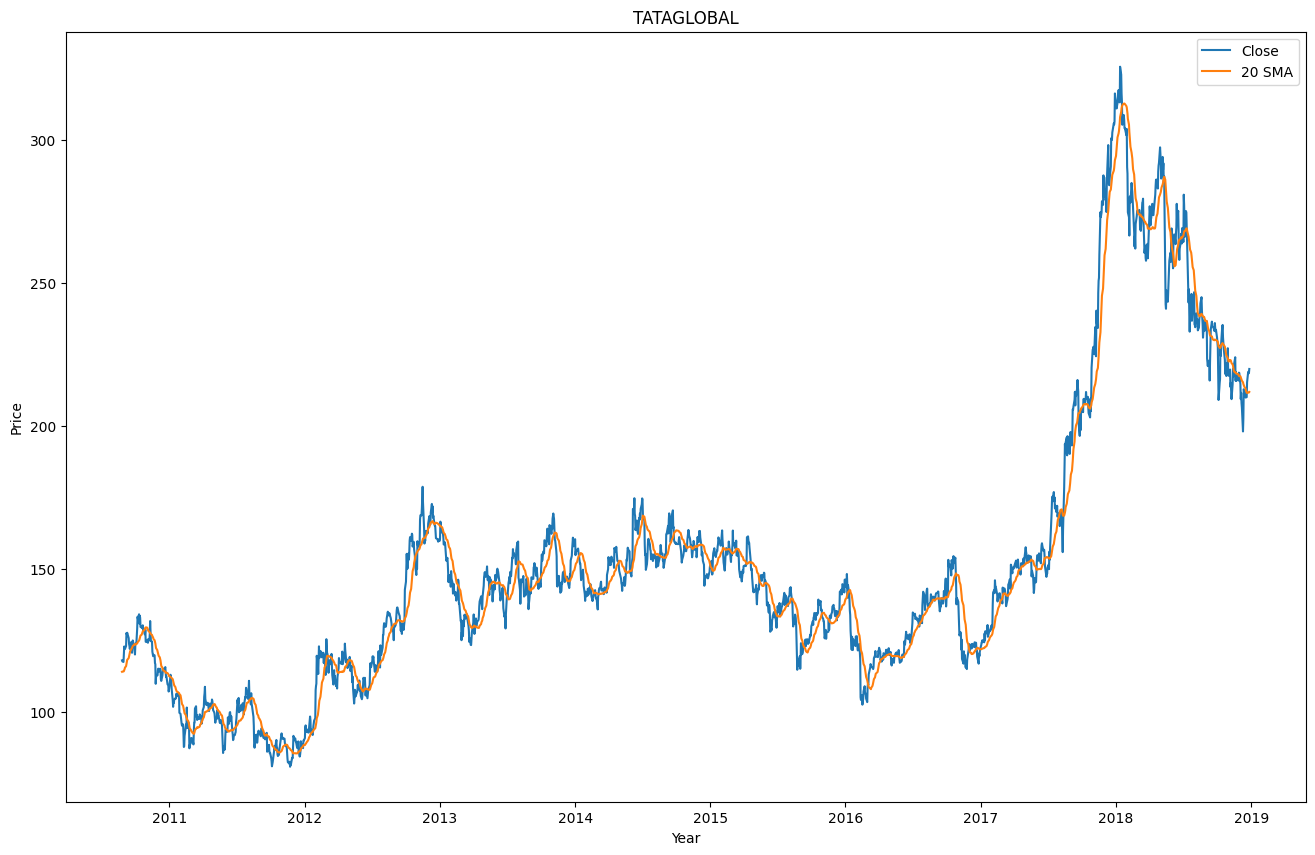

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(data['Close'])
plt.plot(data['20 SMA'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('TATAGLOBAL')
plt.legend(['Close','20 SMA'])
plt.show()

## Model for Swing Y2

In [ ]:
X2=data_balanced2[['Close - Open','High - Low','VWAP','20 SMA','Momentum']]
y2=data_balanced2['Y2']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

### Scaling X2

In [ ]:
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

### Train Test Split

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.25, random_state=44)

### Hypertuning the model

In [ ]:
error_rate = []

for i in range(1,5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X2_train,y2_train)
    pred_i=knn.predict(X2_test)
    error_rate.append(np.mean(pred_i != y2_test))

Text(0, 0.5, 'Error Rate')

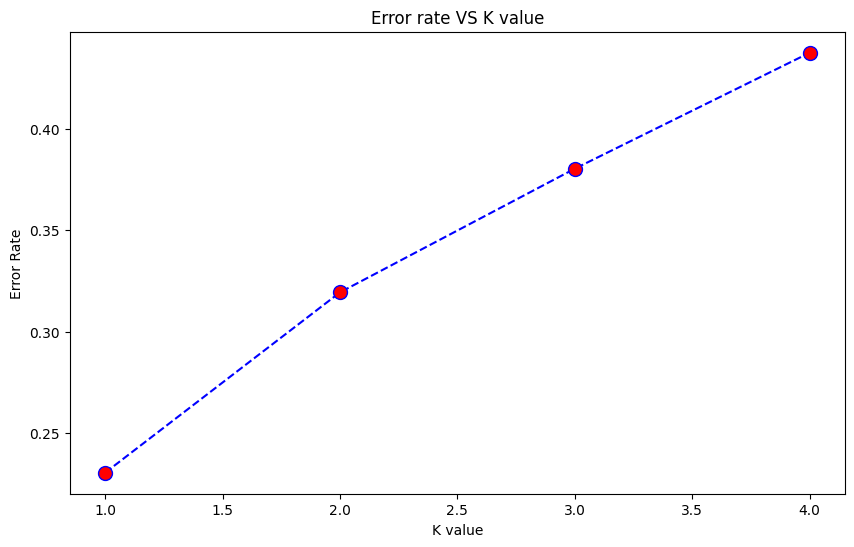

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,5),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize='10')
plt.title('Error rate VS K value')
plt.xlabel('K value')
plt.ylabel('Error Rate')

### Fitting KNN model

In [ ]:
knn_Y2 = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn_Y2.fit(X2_train,y2_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
predictions_sw = knn_Y2.predict(X2_test)

### Model Analysis

In [ ]:
accuracy_score(y2_test,predictions_sw)

0.7697201017811705

In [ ]:
print(classification_report(y2_test,predictions_sw))

              precision    recall  f1-score   support

          -3       0.73      0.80      0.76       114
          -2       0.75      0.80      0.78       104
          -1       0.70      0.66      0.68       115
           0       1.00      1.00      1.00       119
           1       0.73      0.67      0.70       119
           2       0.70      0.71      0.70       106
           3       0.75      0.74      0.75       109

    accuracy                           0.77       786
   macro avg       0.77      0.77      0.77       786
weighted avg       0.77      0.77      0.77       786



The model achieves an accuracy and precision of around 77% for swing trading.


> If the model pridcts:

 - 3 = 7% + in next 7 days (Highly bullish).
 - 2 = 5% to 7% in next 7 days (medium bullish).
 - 1 = 2% to 5% in next 7 days (average to neutral bullish).




---



 - -1 = -2% to -5% in next 7 days (average to neutral bearish).
 - -2 = -5% to -7% in next 7 days (medium bearish).
 - -3 = less than -7%  in next 7 days (Highly bearish).



# Thank You